# Exploración de Datos 

In [1]:
import pandas as pd 
# Importar los datos
%cd ~/work/
df_train = pd.read_csv('all_train.csv', encoding = 'UTF-8')
df_dev = pd.read_csv('all_dev.csv', encoding = 'UTF-8')
df_test = pd.read_csv('all_test.csv', encoding = 'UTF-8')

# Unir los tres DataFrames
df = pd.concat([df_train, df_dev, df_test], ignore_index=True)

/datasets/_deepnote_work


In [2]:
# CSV con 1.6 millones de tweets no relacionados
import pandas as pd

# Cargar el dataset (Sentiment140)
df_sen = pd.read_csv(
    "Dataset/training.1600000.processed.noemoticon.csv",
    encoding="latin-1",
    header=None,
    names=["target", "ids", "date", "flag", "user", "text"]
)

# Mostrar 5 tweets de ejemplo
df_sen.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
d1, d2 = df.shape
print('Son', d1,'filas entre los 3, es decir, son el total de tuits, y', d2, 'columnas.')

Son 76466 filas entre los 3, es decir, son el total de tuits, y 3 columnas.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76466 entries, 0 to 76465
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet_id     76466 non-null  int64 
 1   tweet_text   76466 non-null  object
 2   class_label  76466 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.8+ MB


In [5]:
!pip install dataframe_image==0.1.14

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 1.0 MB/s eta 0:00:00
  Created wheel for ChromeController: filename=ChromeController-0.3.32-py3-none-any.whl size=335298 sha256=1e4e4b0832a443efe4ad1bbe9cba433ae533607e9fca47fc3ed23fd32f300dba
  Stored in directory: /root/.cache/pip/wheels/56/49/82/566516dc92182166db342981fe793e9cedcabf140e9a19b1d9
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=4724fae1a734d04797c817e1afecf5b650c1f75155d524e33895bb49b3befadd
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built ChromeController docopt
  Attempting uninstall: dataframe_image
    Found existing installation: dataframe_image 0.2.7
    

### Cargar 

In [6]:
import dataframe_image as dfi
df_c = pd.DataFrame()
df_c = df['class_label'].value_counts().reset_index()
df_c.columns = ['class_label', 'count']
dfi.export(df_c, "df_c.png", table_conversion='matplotlib')

### Tweets por etiqueta

In [7]:
df.groupby(['class_label'])['class_label'].count()

class_label
caution_and_advice                         5393
displaced_people_and_evacuations           3999
infrastructure_and_utility_damage          8162
injured_or_dead_people                     7301
missing_or_found_people                     358
not_humanitarian                           6296
other_relevant_information                12141
requests_or_urgent_needs                   2618
rescue_volunteering_or_donation_effort    21274
sympathy_and_support                       8924
Name: class_label, dtype: int64

### Gráfica de frecuencia de palabras

In [8]:
#import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
#plt.bar(df_c['class_label'],df_c['count'])
#plt.ylabel('Cantidad')
#plt.xlabel('Etiquetas')
#plt.title('Cantidad de tuits con cada etiqueta')
#plt.legend()
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.savefig('grafico_cantidad')
#plt.show()

### Conteo de palabras

In [9]:
from collections import Counter
import re
import pandas as pd
import dataframe_image as dfi

# Función para generar frecuencias
def generar_frecuencias(df, columna="tweet_text", n=100, exportar=True):
    """
    Genera un DataFrame con las n palabras más frecuentes en la columna especificada.
    
    Parámetros:
    - df: DataFrame de entrada.
    - columna: nombre de la columna que contiene el texto.
    - n: número de palabras más frecuentes a mostrar (por defecto 100).
    - exportar: si True, exporta CSV y PNG.
    """
    # Concatenar todos los textos
    all_text = " ".join(df[columna].astype(str))

    # Normalizar: minúsculas y solo palabras
    words = re.findall(r"\b\w+\b", all_text.lower())

    # Contar frecuencias
    word_counts = Counter(words)

    # Crear DataFrame ordenado
    df_resultados = pd.DataFrame(word_counts.most_common(n), columns=["palabra", "frecuencia"])

    # Exportar resultados
    if exportar:
        df_resultados.to_csv("df_resultados.csv", index=False)
        dfi.export(df_resultados.head(), "df_resultados.png", table_conversion="matplotlib")

    return df_resultados

In [10]:
# Generar frecuencias y exportar resultados
df_resultados = generar_frecuencias(df, columna="tweet_text", n=100, exportar=True)

# Mostrar las 10 palabras más frecuentes
df_resultados.head(10)

,palabra,frecuencia
0,the,56545
1,to,50551
2,in,38281
3,of,33604
4,and,30879
5,for,23169
6,a,20286
7,hurricane,16466
8,is,16183
9,are,13159


### Palabras únicas

In [11]:
def obtener_todas_palabras_unicas(columna_texto):
    todas_palabras = set()
    for texto in columna_texto:
        if pd.notna(texto):
            palabras = str(texto).lower().split()
            todas_palabras.update(palabras)
    return todas_palabras

palabras_unicas_totales = obtener_todas_palabras_unicas(df['tweet_text'])
print(f"\nPalabras únicas en todo el DataFrame: {len(palabras_unicas_totales)}")


Palabras únicas en todo el DataFrame: 132875


# Carga de datos por categoría

In [12]:
ruta = "/work/Dataset"

# Lista para acumular todos los DataFrames
df_list = []

# Recorremos todos los archivos .tsv del directorio
for archivo in os.listdir(ruta):
    if archivo.endswith(".tsv"):
        # Obtener categoria y tipo del nombre de archivo
        categoria, tipo = archivo.replace(".tsv", "").split("_")

        # Leer archivo
        df_tmp = pd.read_csv(os.path.join(ruta, archivo), sep="\t")

        # Agregar columnas
        df_tmp["categoria"] = categoria
        df_tmp["tipo"] = tipo

        # Guardar en la lista
        df_list.append(df_tmp)

# Concatenar todo en un único DataFrame
df = pd.concat(df_list, ignore_index=True)
df.to_csv('df_tipos.csv', index=False, encoding='utf-8')

In [13]:
# Filtrar test como ejemplo
#df[df["tipo"] == "test"].head()

# Preprocesamiento de los datos

In [14]:
!pip install emoji pkg_resources
!pip install emoji==2.15.0
!pip install symspellpy==6.9.0

ERROR: Could not find a version that satisfies the requirement pkg_resources (from versions: none)
ERROR: No matching distribution found for pkg_resources

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
  Using cached emoji-2.15.0-py3-none-any.whl.metadata (5.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: emoji
    Found existing installation: emoji 1.7.0
    Uninstalling emoji-1.7.0:
      Successfully uninstalled emoji-1.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
clean-text 0.6.0 requires emoji<2.0.0,>=1.0.0, but you have emoji 2.15.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.3
[notic

### Limpieza de datos

In [15]:
import re
import emoji
from symspellpy.symspellpy import SymSpell, Verbosity
import os
import pkg_resources

# Configuración SymSpell
# max 2 ediciones de distancia, prefijo = 7
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Cargar diccionario de frecuencia (incluido en symspellpy
dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")

# Cargar diccionario: (palabra, frecuencia)
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Regex compiladas
URL_PATTERN = re.compile(r'https?://\S+|www\.\S+')
MENTION_HASHTAG_PATTERN = re.compile(r'[@#]\w+')
NUMBERS_PATTERN = re.compile(r'\d+')
PUNCT_TRIM = re.compile(r'^[^\w\s]+|[^\w\s]+$')
MULTISPACE = re.compile(r'\s+')

In [16]:
# Función para limpiar el texto
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Eliminar URLs
    text = URL_PATTERN.sub("", text)

    # Eliminar menciones y hashtags
    text = MENTION_HASHTAG_PATTERN.sub("", text)

    # Eliminar números
    text = NUMBERS_PATTERN.sub("", text)

    # Eliminar emojis
    text = emoji.replace_emoji(text, replace='')

    # Eliminar puntuación al inicio o final
    text = PUNCT_TRIM.sub("", text)

    # Convertir a minúsculas
    text = text.lower()

    # Eliminar espacios múltiples
    text = MULTISPACE.sub(" ", text).strip()

    # Corrección ortográfica con SymSpell
    corrected = []
    for word in text.split():
        suggestion = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        corrected.append(suggestion[0].term if suggestion else word)

    return " ".join(corrected)

In [17]:
# Aplicar la función de limpieza a todo el dataset
df['tweet_text'] = [clean_text(t) for t in df['tweet_text']]

### Separación de datasets para experimentos

In [18]:
# DataFrames sin terremotos (fire, flood, hurricane)
df_noEarthquake_train = df.query("categoria in ['fire','flood','hurricane'] and tipo == 'train'").reset_index(drop=True)
df_noEarthquake_test  = df.query("categoria in ['fire','flood','hurricane'] and tipo == 'test'").reset_index(drop=True)

# DataFrames solo con terremotos
df_earthquake = df.query("categoria == 'earthquake' and tipo == 'train' or categoria == 'earthquake' and tipo == 'test'").reset_index(drop=True)
df_earthquake_test  = df.query("categoria == 'earthquake' and tipo == 'test'").reset_index(drop=True)

C = set(df_noEarthquake_train['tweet_text'])
D = set(df_noEarthquake_test['tweet_text'])
e_comunes = C & D

df_noEarthquake_test_u = df_noEarthquake_test[~df_noEarthquake_test['tweet_text'].isin(e_comunes)].reset_index(drop=True)


In [19]:
# Revisar tamaños
print(f"No-Earthquake train: {df_noEarthquake_train.shape}")
print(f"No-Earthquake test : {df_noEarthquake_test.shape}")
print(f"Earthquake    : {df_earthquake.shape}")
print(f"Earthquake test    : {df_earthquake_test.shape}")

No-Earthquake train: (47272, 5)
No-Earthquake test : (13387, 5)
Earthquake    : (8023, 5)
Earthquake test    : (1773, 5)


# Experimento Preliminar

### Imports

In [20]:
!pip install numpy scipy pandas scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Tokenizar

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizador = CountVectorizer(strip_accents='ascii',stop_words="english")

tweets_train = df_noEarthquake_train['tweet_text']
tweets_test = df_noEarthquake_test_u['tweet_text']
# tweets_test = df_noEarthquake_test['tweet_text']
tweets_earthquake = df_earthquake['tweet_text']

vec_tweets= vectorizador.fit_transform(tweets_train)
vec_tweets_test = vectorizador.transform(tweets_test)
vec_tweets_eq = vectorizador.transform(tweets_earthquake)

In [22]:
df_all_train = df.query("tipo == 'train'").reset_index(drop=True)
df_all_test = df.query("tipo == 'test'").reset_index(drop=True)
#para ver si es que hay repetidos y si los hay eliminarlos de test
A = set(df_all_train['tweet_text'])
B = set(df_all_test['tweet_text'])
e_comunes = A & B

df_all_test_u = df_all_test[~df_all_test['tweet_text'].isin(e_comunes)].reset_index(drop=True)
df_earthquake_test_u = df_earthquake_test[~df_earthquake_test['tweet_text'].isin(e_comunes)].reset_index(drop=True)

# tweets_train_all = df_all_train['tweet_text']
tweets_test_all = df_all_test_u['tweet_text']
# tweets_test_all = df_all_test['tweet_text']
tweets_test_earthquake = df_earthquake_test_u['tweet_text']
tweets_test_earthquake = df_earthquake_test['tweet_text']

vec_all_tweets = vectorizador.fit_transform(tweets_train_all)

vec_all_tweets_test = vectorizador.transform(tweets_test_all)
vec_all_eq_test  = vectorizador.transform(tweets_test_earthquake)

NameError: name 'tweets_train_all' is not defined

Hay repetidos?

In [23]:
A = set(tweets_test_earthquake)
B = set(tweets_train_all)
el_comunes = A & B

if len(el_comunes) > 0:
    print("¡Sí hay elementos en común!")
    print(f"Las frases repetidas son: {el_comunes}")
else:
    print("No hay ninguna frase en común.")
len(el_comunes)

¡Sí hay elementos en común!
Las frases repetidas son: {'praying for everyone safety', 'where to donate to mexico earthquake victims', 'stay safe everyone of', 'community grateful donations for earthquake victims in mexico', 'it a donate', 'how you can help survivors of the massive earthquake in ecuador'}


6

In [24]:
conjunto_A = set(tweets_test)
conjunto_B = set(tweets_earthquake)

# 3. Buscamos la intersección (&)
elementos_comunes = conjunto_A & conjunto_B

if len(elementos_comunes) > 0:
    print("¡Sí hay elementos en común!")
    print(f"Las frases repetidas son: {elementos_comunes}")
else:
    print("No hay ninguna frase en común.")

¡Sí hay elementos en común!
Las frases repetidas son: {'stay safe everyone', 'it a mob to donate a million to assist communities impacted by hurricane maria in or and the earthquake in mexico'}


## Entrenar el modelo

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

#Naive Bayes multinomial
multLNB = MultinomialNB()

#entrenamos el modelo
etiquetas = df_noEarthquake_train['class_label']
multLNB.fit(vec_tweets,etiquetas)

#vemos la eficacia de las predicciones
labels_pred= multLNB.predict(vec_tweets_test)

#Desempeño
precision_recall_fscore_support(df_noEarthquake_test_u['class_label'],labels_pred,average='weighted')
# precision_recall_fscore_support(df_noEarthquake_test['class_label'],labels_pred,average='weighted')

(0.6632031195678442, 0.6711735265556137, 0.6543016983597225, None)

In [26]:
#ahora podemos predecir usando los tweets durante terremotos
etiquetas_pred_earthquake= multLNB.predict(vec_tweets_eq)
etiquetas_earthquake=df_earthquake['class_label']
precision_recall_fscore_support(etiquetas_earthquake,etiquetas_pred_earthquake,average='weighted')


(0.7408576556063886, 0.7206780506045121, 0.7180575324580403, None)

In [27]:
#Entrenamiento de un modelo con todos los desastres
multLNB_eq = MultinomialNB()

etiquetas_all = df_all_train['class_label']
multLNB_eq.fit(vec_all_tweets,etiquetas_all)

labels_pred_all = multLNB_eq.predict(vec_all_tweets_test)
precision_recall_fscore_support(df_all_test_u['class_label'],labels_pred_all,average='weighted')
# precision_recall_fscore_support(df_all_test['class_label'],labels_pred_all,average='weighted')


(0.6710290936479846, 0.6798812664907652, 0.6617770805914037, None)

In [28]:
#Ahova probemos predecir usando unicamente con los tweets de los terremotos
etiquetas_all_pred_eq = multLNB_eq.predict(vec_all_eq_test)
etiquetas_test_eq = df_earthquake_test_u['class_label']
# etiquetas_test_eq = df_earthquake_test['class_label']
precision_recall_fscore_support(etiquetas_test_eq,etiquetas_all_pred_eq,average='weighted')

(0.731602984164189, 0.7518330513254371, 0.7257100894541716, None)

## Métricas 


--- Classification Report (sin support) ---

                                        precision  recall  f1-score
caution_and_advice                          0.678   0.752     0.713
displaced_people_and_evacuations            0.852   0.759     0.803
infrastructure_and_utility_damage           0.784   0.817     0.800
injured_or_dead_people                      0.805   0.901     0.850
missing_or_found_people                     0.847   0.244     0.379
not_humanitarian                            0.735   0.637     0.682
other_relevant_information                  0.697   0.532     0.604
requests_or_urgent_needs                    0.821   0.303     0.443
rescue_volunteering_or_donation_effort      0.751   0.923     0.828
sympathy_and_support                        0.775   0.747     0.760
accuracy                                    0.755   0.755     0.755
macro avg                                   0.775   0.661     0.686
weighted avg                                0.755   0.755     0.744


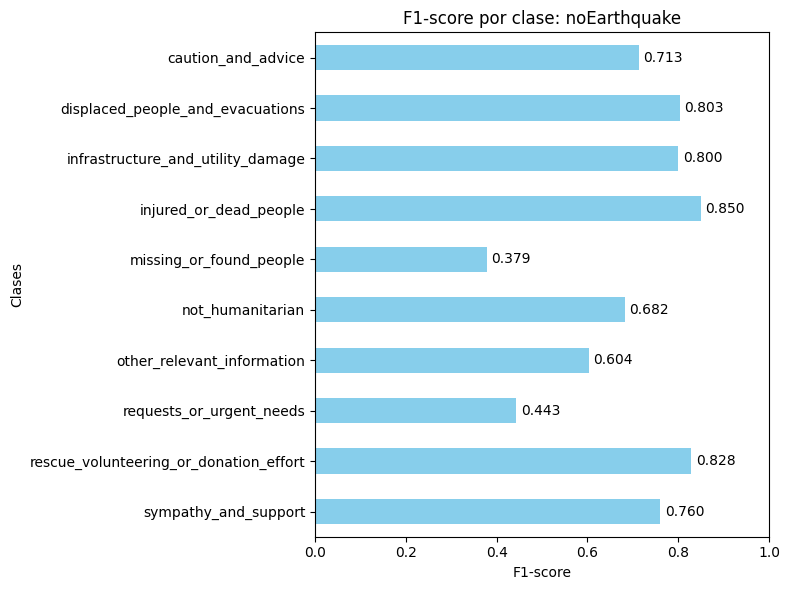

In [29]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

labels_pred= multLNB.predict(vec_tweets)
etiquetas = df_noEarthquake_train['class_label']

report_dict = classification_report(
    etiquetas,
    labels_pred,
    output_dict=True,
    digits=3
)

df_report = pd.DataFrame(report_dict).T.drop(columns=['support'])

print("\n--- Classification Report (sin support) ---\n")
print(df_report.to_string(float_format="%.3f"))

df_classes = df_report.iloc[:-3]

# -------------------------------
# Gráfico de barras horizontales
plt.figure(figsize=(8, 6))
df_classes['f1-score'].plot(kind='barh', color='skyblue')

plt.xlabel("F1-score")
plt.ylabel("Clases")
plt.title("F1-score por clase: noEarthquake")
plt.xlim(0, 1)  # porque F1-score va de 0 a 1
plt.gca().invert_yaxis()  # para que la primera clase quede arriba

# Mostrar valores sobre las barras
for i, v in enumerate(df_classes['f1-score']):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.savefig('f1-noEarthquake')

plt.show()


--- Classification Report (sin support) ---

                                        precision  recall  f1-score
caution_and_advice                          0.592   0.649     0.619
displaced_people_and_evacuations            0.814   0.684     0.743
infrastructure_and_utility_damage           0.714   0.747     0.730
injured_or_dead_people                      0.743   0.852     0.794
missing_or_found_people                     0.778   0.194     0.311
not_humanitarian                            0.556   0.438     0.490
other_relevant_information                  0.506   0.389     0.440
requests_or_urgent_needs                    0.726   0.189     0.300
rescue_volunteering_or_donation_effort      0.702   0.901     0.789
sympathy_and_support                        0.725   0.660     0.691
accuracy                                    0.671   0.671     0.671
macro avg                                   0.685   0.570     0.591
weighted avg                                0.663   0.671     0.654


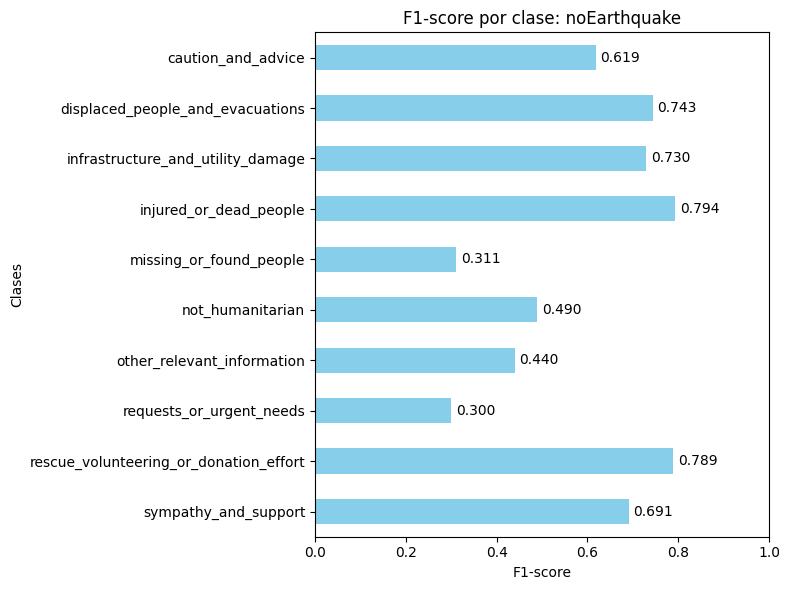

In [33]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

labels_pred= multLNB.predict(vec_tweets_test)
etiquetas = df_noEarthquake_test_u['class_label']
# etiquetas = df_noEarthquake_test['class_label']

report_dict = classification_report(
    etiquetas,
    labels_pred,
    output_dict=True,
    digits=3
)

df_report = pd.DataFrame(report_dict).T.drop(columns=['support'])

print("\n--- Classification Report (sin support) ---\n")
print(df_report.to_string(float_format="%.3f"))

df_classes = df_report.iloc[:-3]

# -------------------------------
# Gráfico de barras horizontales
plt.figure(figsize=(8, 6))
df_classes['f1-score'].plot(kind='barh', color='skyblue')

plt.xlabel("F1-score")
plt.ylabel("Clases")
plt.title("F1-score por clase: noEarthquake")
plt.xlim(0, 1)  # porque F1-score va de 0 a 1
plt.gca().invert_yaxis()  # para que la primera clase quede arriba

# Mostrar valores sobre las barras
for i, v in enumerate(df_classes['f1-score']):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.savefig('f1-noEarthquake')

plt.show()


--- Classification Report (sin support) ---

                                        precision  recall  f1-score
caution_and_advice                          0.721   0.375     0.494
displaced_people_and_evacuations            0.733   0.423     0.537
infrastructure_and_utility_damage           0.755   0.647     0.697
injured_or_dead_people                      0.835   0.851     0.843
not_humanitarian                            0.463   0.347     0.396
other_relevant_information                  0.301   0.536     0.385
requests_or_urgent_needs                    0.629   0.108     0.185
rescue_volunteering_or_donation_effort      0.758   0.829     0.792
sympathy_and_support                        0.861   0.854     0.857
accuracy                                    0.721   0.721     0.721
macro avg                                   0.673   0.552     0.576
weighted avg                                0.741   0.721     0.718


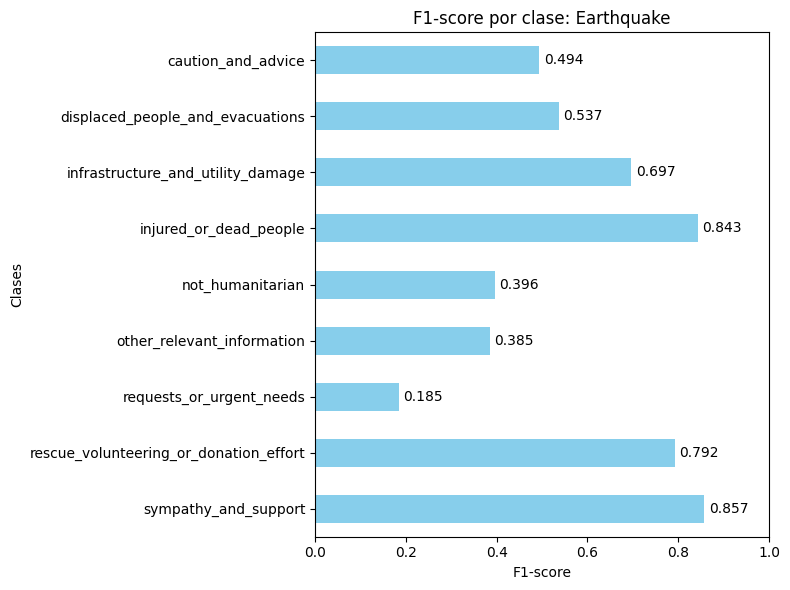

In [36]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

etiquetas_pred_earthquake = multLNB.predict(vec_tweets_eq)
etiquetas_earthquake = df_earthquake['class_label']


report_dict = classification_report(
    etiquetas_earthquake,
    etiquetas_pred_earthquake,
    output_dict=True,
    digits=3
)


df_report = pd.DataFrame(report_dict).T.drop(columns=['support'])


print("\n--- Classification Report (sin support) ---\n")
print(df_report.to_string(float_format="%.3f"))


df_classes = df_report.iloc[:-3]

# -------------------------------
# Gráfico de barras horizontales
plt.figure(figsize=(8, 6))
df_classes['f1-score'].plot(kind='barh', color='skyblue')

plt.xlabel("F1-score")
plt.ylabel("Clases")
plt.title("F1-score por clase: Earthquake")
plt.xlim(0, 1)  # porque F1-score va de 0 a 1
plt.gca().invert_yaxis()  # para que la primera clase quede arriba

# Mostrar valores sobre las barras
for i, v in enumerate(df_classes['f1-score']):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.savefig('f1-Earthquake')

plt.show()


--- Classification Report (sin support) ---

                                        precision  recall  f1-score
caution_and_advice                          0.590   0.654     0.621
displaced_people_and_evacuations            0.815   0.671     0.736
infrastructure_and_utility_damage           0.715   0.737     0.726
injured_or_dead_people                      0.744   0.867     0.801
missing_or_found_people                     0.800   0.167     0.276
not_humanitarian                            0.557   0.422     0.480
other_relevant_information                  0.501   0.371     0.426
requests_or_urgent_needs                    0.748   0.171     0.278
rescue_volunteering_or_donation_effort      0.709   0.902     0.794
sympathy_and_support                        0.749   0.736     0.743
accuracy                                    0.680   0.680     0.680
macro avg                                   0.693   0.570     0.588
weighted avg                                0.671   0.680     0.662


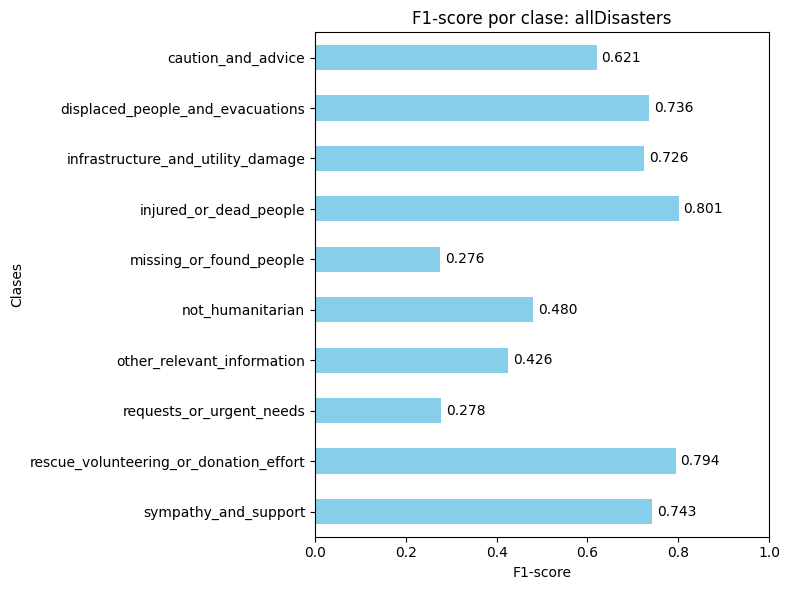

In [39]:
labels_pred_all =multLNB_eq.predict(vec_all_tweets_test)
etiquetas_all = df_all_test_u['class_label']
# etiquetas_all = df_all_test['class_label']

report_dict = classification_report(
    etiquetas_all,
    labels_pred_all,
    output_dict=True,
    digits=3
)

df_report = pd.DataFrame(report_dict).T.drop(columns=['support'])

print("\n--- Classification Report (sin support) ---\n")
print(df_report.to_string(float_format="%.3f"))

df_classes = df_report.iloc[:-3]

# -------------------------------
# Gráfico de barras horizontales
plt.figure(figsize=(8, 6))
df_classes['f1-score'].plot(kind='barh', color='skyblue')

plt.xlabel("F1-score")
plt.ylabel("Clases")
plt.title("F1-score por clase: allDisasters")
plt.xlim(0, 1)  # porque F1-score va de 0 a 1
plt.gca().invert_yaxis()  # para que la primera clase quede arriba

# Mostrar valores sobre las barras
for i, v in enumerate(df_classes['f1-score']):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.savefig('f1-allDisasters')

plt.show()


--- Classification Report (sin support) ---

                                        precision  recall  f1-score
caution_and_advice                          0.675   0.648     0.661
displaced_people_and_evacuations            0.778   0.412     0.538
infrastructure_and_utility_damage           0.721   0.697     0.709
injured_or_dead_people                      0.752   0.918     0.827
not_humanitarian                            0.605   0.265     0.369
other_relevant_information                  0.383   0.220     0.279
requests_or_urgent_needs                    0.750   0.067     0.122
rescue_volunteering_or_donation_effort      0.783   0.882     0.829
sympathy_and_support                        0.815   0.908     0.859
accuracy                                    0.752   0.752     0.752
macro avg                                   0.696   0.557     0.577
weighted avg                                0.732   0.752     0.726


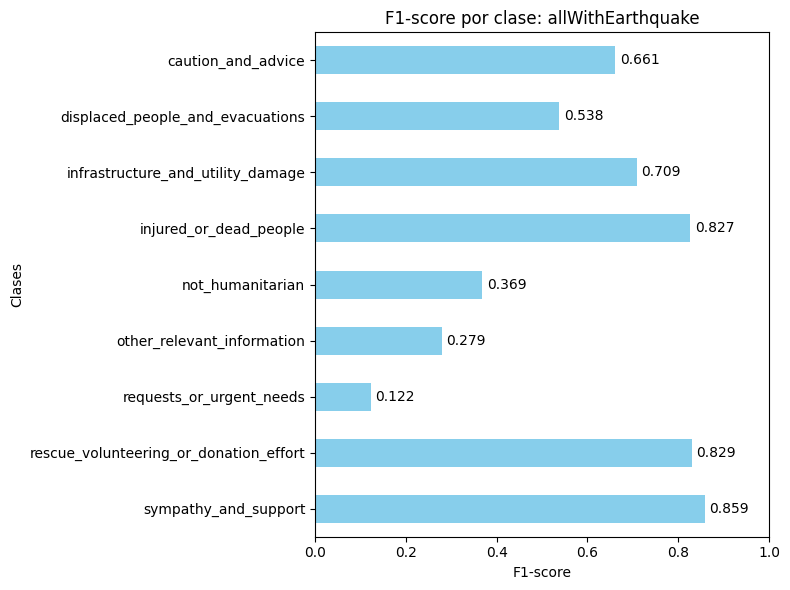

In [42]:
etiquetas_pred_all_eq = multLNB_eq.predict(vec_all_eq_test)
etiquetas_earthquake_test = df_earthquake_test_u['class_label']
# etiquetas_earthquake_test = df_earthquake_test['class_label']


report_dict = classification_report(
    etiquetas_earthquake_test,
    etiquetas_pred_all_eq,
    output_dict=True,
    digits=3
)


df_report = pd.DataFrame(report_dict).T.drop(columns=['support'])


print("\n--- Classification Report (sin support) ---\n")
print(df_report.to_string(float_format="%.3f"))


df_classes = df_report.iloc[:-3]

# -------------------------------
# Gráfico de barras horizontales
plt.figure(figsize=(8, 6))
df_classes['f1-score'].plot(kind='barh', color='skyblue')

plt.xlabel("F1-score")
plt.ylabel("Clases")
plt.title("F1-score por clase: allWithEarthquake")
plt.xlim(0, 1)  # porque F1-score va de 0 a 1
plt.gca().invert_yaxis()  # para que la primera clase quede arriba

# Mostrar valores sobre las barras
for i, v in enumerate(df_classes['f1-score']):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center')

plt.tight_layout()
plt.savefig('f1-allWithEarthquake')

plt.show()

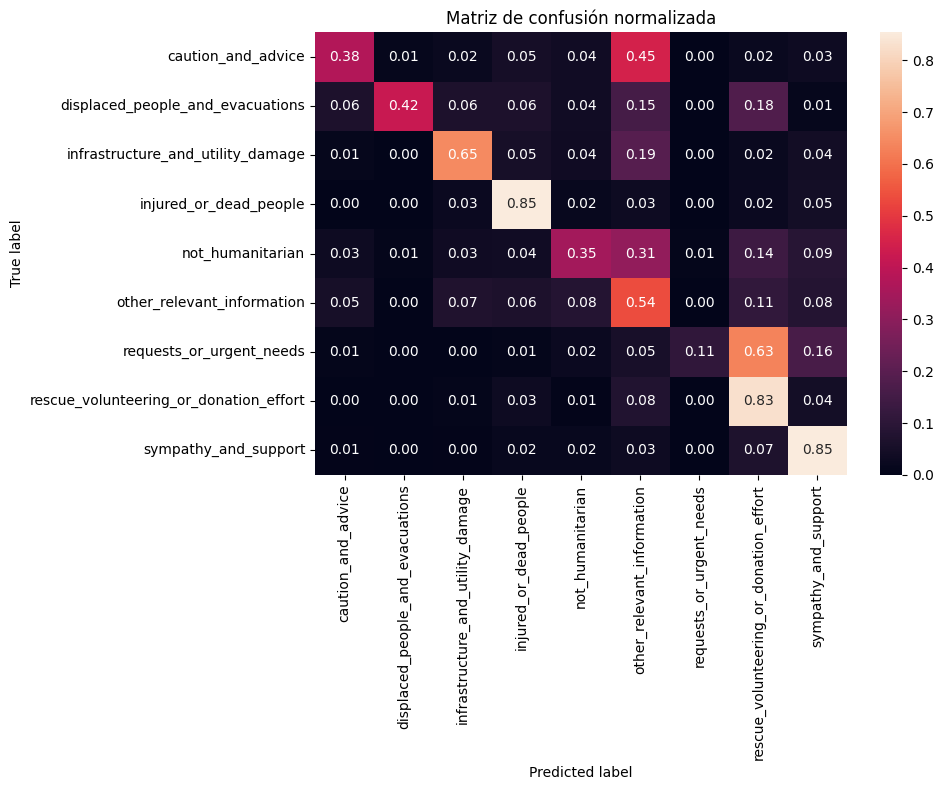

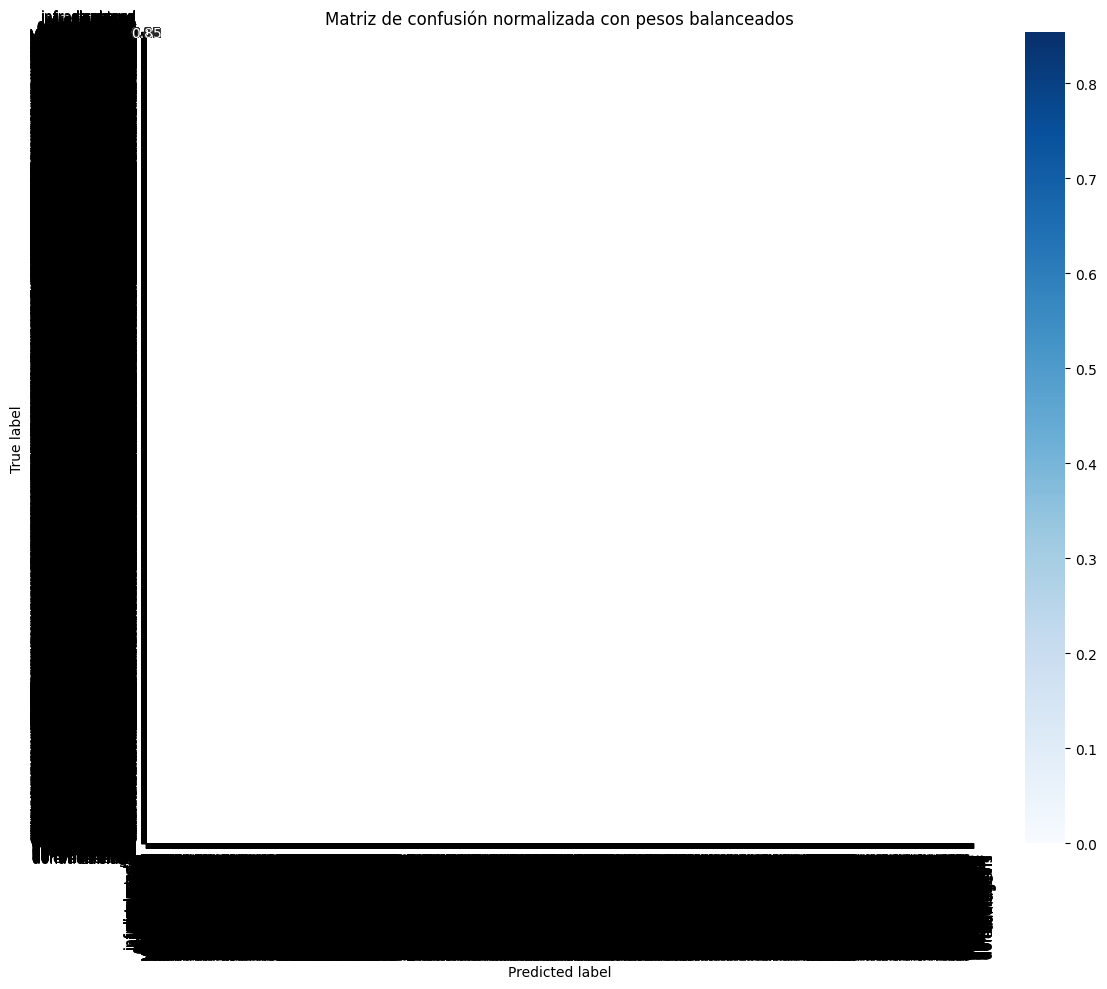

In [35]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap


cm = confusion_matrix(etiquetas_earthquake, etiquetas_pred_earthquake, labels=df_classes.index)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", xticklabels=df_classes.index, yticklabels=df_classes.index)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Matriz de confusión normalizada")
plt.tight_layout()
plt.savefig('matriz de confucion')
plt.show()

#formato de la tabla
def format_label(label, max_width=15):
    formatted = label.replace('_', ' ')
    return '\n'.join(textwrap.wrap(formatted, max_width))

formatted_etiquetas = [format_label(label) for label in etiquetas]

plt.figure(figsize=(12,10))
sns.heatmap(cm_norm, annot=True, fmt=".2f", xticklabels=formatted_etiquetas, yticklabels=formatted_etiquetas, cmap='Blues')
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Matriz de confusión normalizada con pesos balanceados")
plt.tight_layout()
plt.savefig('matriz de confucion')
plt.show()


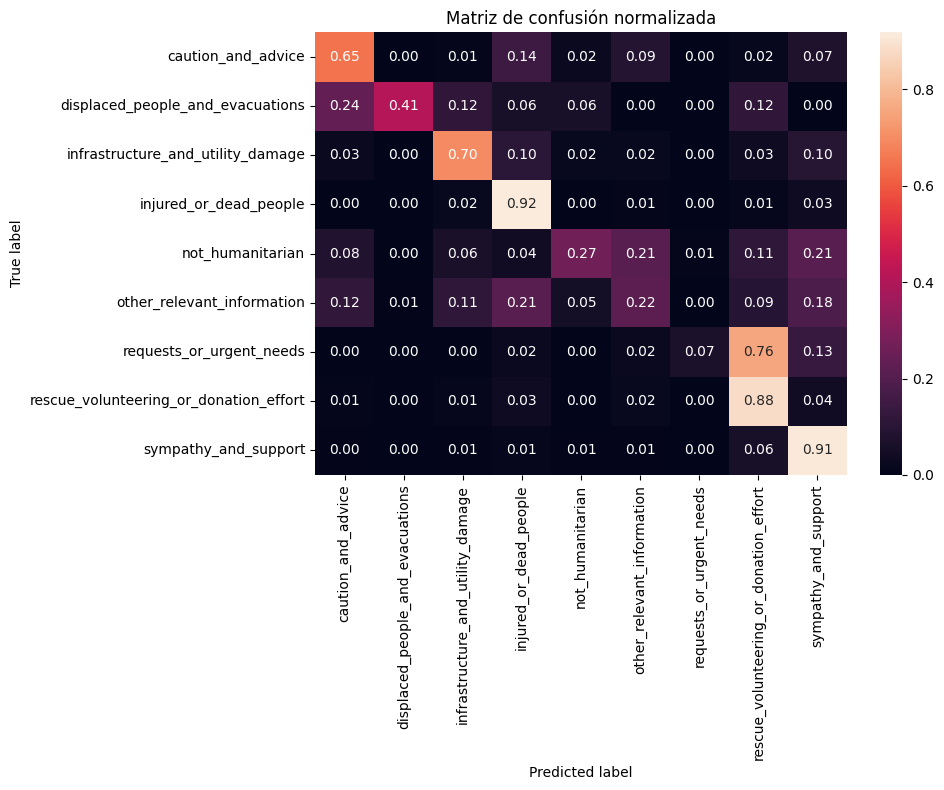

In [36]:
cm = confusion_matrix(etiquetas_earthquake_test, etiquetas_pred_all_eq, labels=df_classes.index)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_norm, annot=True, fmt=".2f", xticklabels=df_classes.index, yticklabels=df_classes.index)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Matriz de confusión normalizada")
plt.tight_layout()
plt.savefig('matriz de confucion')
plt.show()

## Nube de palabras

In [37]:
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt

# frecuencias = dict(zip(df_filtrado["palabra"], df_filtrado["frecuencia"]))

# # Crear la nube de palabras
# wordcloud = WordCloud(
#     width=800,
#     height=400,
#     background_color='white'
# ).generate_from_frequencies(frecuencias)



# plt.figure(figsize=(12,5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.savefig('word_cloud1')
# plt.show()

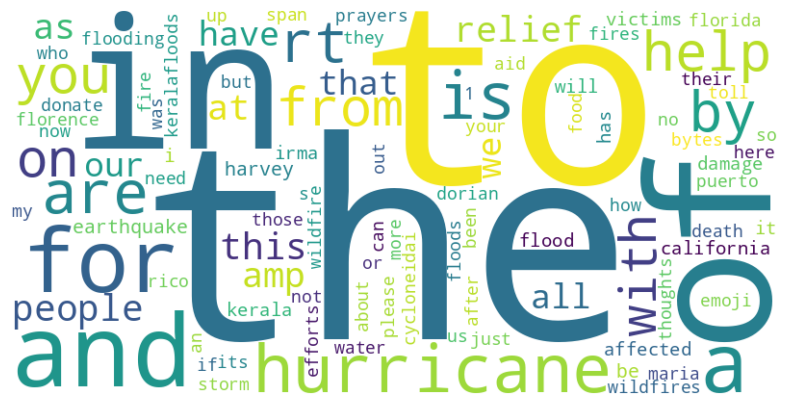

In [38]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

frecuencias = dict(zip(df_resultados["palabra"], df_resultados["frecuencia"]))

# Crear la nube de palabras
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(frecuencias)



plt.figure(figsize=(12,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Para duplicar aleatoriamente las filas de cada clase minoritaria hasta alcanzar el tamaño de la clase más grande:

# Segundo Experimento

### Función para graficar F1 y Matriz de confusión

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


def evaluar_modelo(y_true, y_pred, df, nombre_modelo="modelo"):
    # Obtener clases ordenadas desde el DataFrame original
    class_labels = sorted(df['class_label'].unique())

    # Crear classification report como diccionario
    report_dict = classification_report(
        y_true,
        y_pred,
        output_dict=True,
        digits=3
    )

    # Convertir a DataFrame y eliminar support
    df_report = pd.DataFrame(report_dict).T.drop(columns=['support'])

    # Excluir accuracy, macro avg y weighted avg
    df_classes = df_report.iloc[:-3]

    # Gráfico del F1-score por clase
    plt.figure(figsize=(8, 6))
    df_classes['f1-score'].plot(kind='barh', color='skyblue')

    plt.xlabel("F1-score")
    plt.ylabel("Clases")
    plt.title(f"F1-score por clase ({nombre_modelo})")
    plt.xlim(0, 1)
    plt.gca().invert_yaxis()

    for i, v in enumerate(df_classes['f1-score']):
        plt.text(v + 0.01, i, f"{v:.3f}", va='center')

    plt.tight_layout()
    plt.savefig(f"f1score_{nombre_modelo}.png")
    plt.show()

    # Matriz de confusión normalizada
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    cm_norm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_norm,
                annot=True,
                fmt=".2f",
                xticklabels=class_labels,
                yticklabels=class_labels)

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f"Matriz de confusión normalizada ({nombre_modelo})")
    plt.tight_layout()
    plt.savefig(f"matriz_confusion_{nombre_modelo}.png")
    plt.show()



## Entrenamiento con clustering

### Equilibrar cantidad de tweets por etiqueta quitando elementos

In [40]:
import pandas as pd

# Separar datasets
df_train = df[df['tipo'] == 'train'].copy()
df_dev   = df[df['tipo'] == 'dev'].copy()
df_test  = df[df['tipo'] == 'test'].copy()

# Conteos originales
train_counts = df_train['class_label'].value_counts()
dev_counts   = df_dev['class_label'].value_counts()

# Calcular cuántos faltan por clase usando TRAIN + DEV
target_by_class = (train_counts + dev_counts).max()
faltantes = target_by_class - train_counts

# Extender TRAIN usando muestras de DEV
df_train_extended = df_train.copy()

for clase, n_faltan in faltantes.items():
    if n_faltan > 0:
        df_extra = df_dev[df_dev['class_label'] == clase].sample(
            n=min(n_faltan, len(df_dev[df_dev['class_label'] == clase])),
            replace=False,
            random_state=42
        )
        df_train_extended = pd.concat([df_train_extended, df_extra], ignore_index=True)

# Fijar tamaño objetivo
fixed_size = 286

# Crear dataset balanceado
df_train_balanced = pd.DataFrame()

for clase in df_train_extended['class_label'].unique():
    df_c = df_train_extended[df_train_extended['class_label'] == clase]
    actual_size = len(df_c)

    # Si hay suficientes datos, recortar a 1500
    if actual_size >= fixed_size:
        df_c_down = df_c.sample(n=fixed_size, replace=False, random_state=42)

    # Si no hay suficientes, dejar todos los datos
    else:
        df_c_down = df_c

    df_train_balanced = pd.concat([df_train_balanced, df_c_down], ignore_index=True)

# Mezclar para aleatorizar
df_train = df_train_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar distribución final
print("Distribución final:\n")
print(df_train['class_label'].value_counts())


Distribución final:

class_label
displaced_people_and_evacuations          286
not_humanitarian                          286
sympathy_and_support                      286
caution_and_advice                        286
injured_or_dead_people                    286
missing_or_found_people                   286
rescue_volunteering_or_donation_effort    286
infrastructure_and_utility_damage         286
requests_or_urgent_needs                  286
other_relevant_information                286
Name: count, dtype: int64


In [41]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X_train_text = df_train['tweet_text']
y_train      = df_train['class_label']

X_test_text  = df_test['tweet_text']
y_test       = df_test['class_label']

vectorizador = CountVectorizer(strip_accents='ascii',
                               stop_words='english')

# vectorizador = TfidfVectorizer(strip_accents='ascii',
#                                stop_words='english')


vec_train = vectorizador.fit_transform(X_train_text)
vec_test = vectorizador.transform(X_test_text)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(vec_train, y_train)

# Predecir en test
y_pred = knn.predict(vec_test)

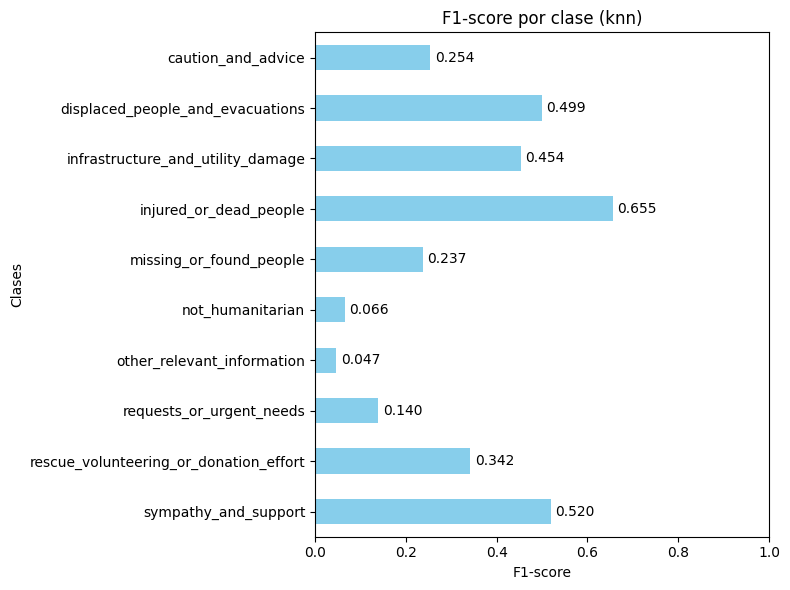

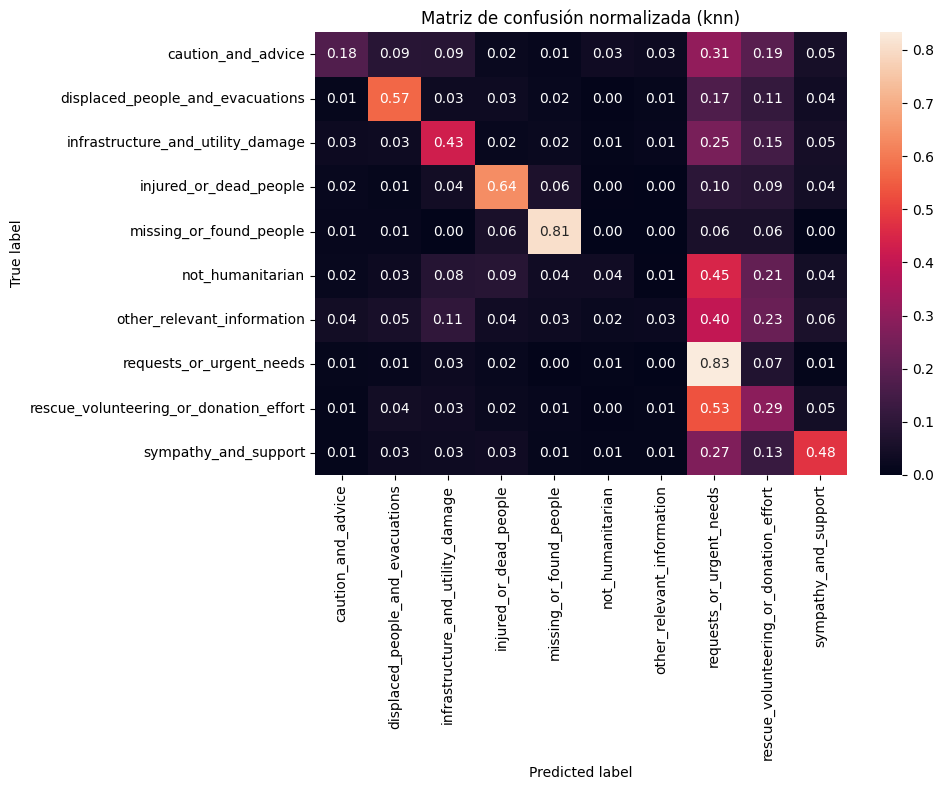

In [43]:
evaluar_modelo(y_test, y_pred, df_train, nombre_modelo="knn")

### Equilibrar cantidad de tweets por etiqueta duplicando elementos

In [44]:
import pandas as pd
import numpy as np


# Obtener conteos actuales
counts = df['class_label'].value_counts().sort_index()
max_count = counts.max()  # 21274

print("Conteos originales:")
print(counts)
print(f"\nObjetivo: duplicar hasta {max_count} ejemplos por clase.")

# Crear una lista para almacenar los DataFrames balanceados
balanced_dfs = []

for class_label in df['class_label'].unique():
    class_df = df[df['class_label'] == class_label]
    current_count = len(class_df)
    
    if current_count < max_count:
        # Calcular cuántas veces necesitamos duplicar (con muestreo con reemplazo)
        n_duplicates = max_count - current_count
        # Muestrear con reemplazo para duplicar
        duplicates = class_df.sample(n=n_duplicates, replace=True, random_state=42).reset_index(drop=True)
        # Concatenar original + duplicados
        balanced_class_df = pd.concat([class_df, duplicates], ignore_index=True)
    else:
        # Si ya tiene suficientes, dejarlo como está
        balanced_class_df = class_df.copy()
    
    balanced_dfs.append(balanced_class_df)

# Combinar todo
df_balanced = pd.concat(balanced_dfs, ignore_index=True)
# Verificar nuevos conteos
new_counts = df_balanced['class_label'].value_counts().sort_index()
print("\nConteos después del balanceo:")
print(new_counts)

Conteos originales:
class_label
caution_and_advice                         5393
displaced_people_and_evacuations           3999
infrastructure_and_utility_damage          8163
injured_or_dead_people                     7302
missing_or_found_people                     358
not_humanitarian                           6296
other_relevant_information                12141
requests_or_urgent_needs                   2618
rescue_volunteering_or_donation_effort    21276
sympathy_and_support                       8929
Name: count, dtype: int64

Objetivo: duplicar hasta 21276 ejemplos por clase.

Conteos después del balanceo:
class_label
caution_and_advice                        21276
displaced_people_and_evacuations          21276
infrastructure_and_utility_damage         21276
injured_or_dead_people                    21276
missing_or_found_people                   21276
not_humanitarian                          21276
other_relevant_information                21276
requests_or_urgent_needs       

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df_train= df_balanced
X_train_text = df_train['tweet_text']
y_train      = df_train['class_label']

X_test_text  = df_test['tweet_text']
y_test       = df_test['class_label']

vectorizador = CountVectorizer(strip_accents='ascii',
                               stop_words='english')

# vectorizador = TfidfVectorizer(strip_accents='ascii',
#                                stop_words='english')


vec_train = vectorizador.fit_transform(X_train_text)
vec_test = vectorizador.transform(X_test_text)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(vec_train, y_train)

# Predecir en test
y_pred = knn.predict(vec_test)

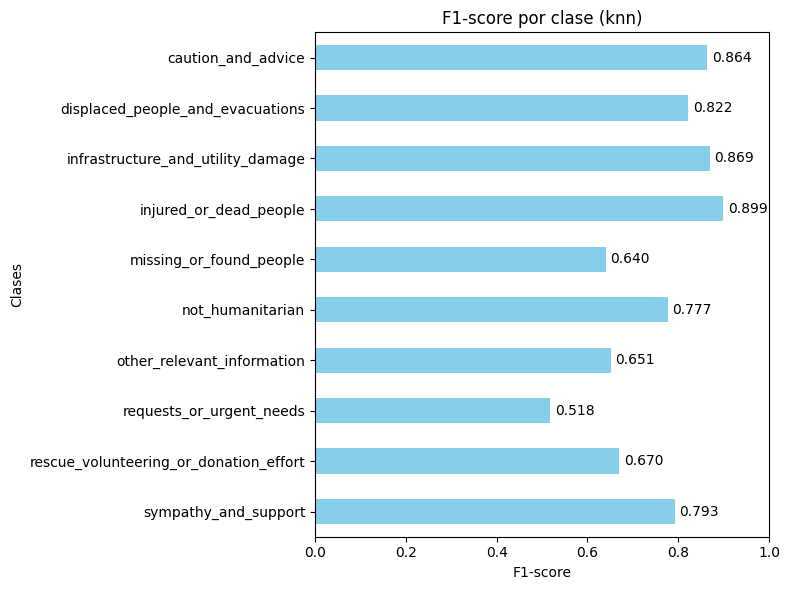

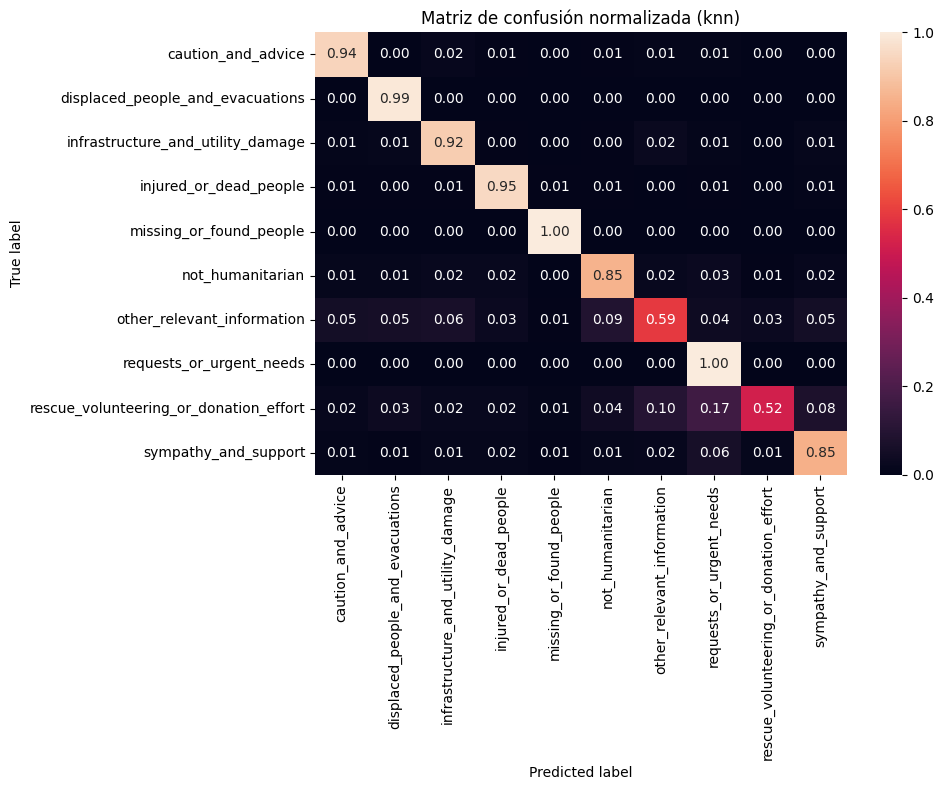

In [47]:
evaluar_modelo(y_test, y_pred, df_train, nombre_modelo="knn")

# Experimento 2: Clustering

### Elegir k para el clustering

/root/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


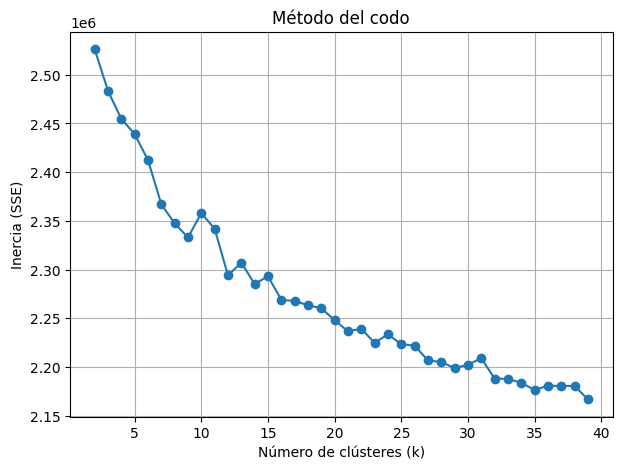

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K = range(2, 40)   # puedes ampliar si quieres

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(vec_train)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertias, marker='o')
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del codo")
plt.grid(True)
plt.show()


### Clustering y entrenamiento

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df_train=df

X_train_text = df_train['tweet_text']
y_train      = df_train['class_label']

X_test_text  = df_test['tweet_text']
y_test       = df_test['class_label']

vectorizador = CountVectorizer(strip_accents='ascii',
                               stop_words='english')

# vectorizador = TfidfVectorizer(strip_accents='ascii',
#                                stop_words='english')


vec_train = vectorizador.fit_transform(X_train_text)
vec_test = vectorizador.transform(X_test_text)

In [50]:
from sklearn.cluster import KMeans
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

# Clustering
k = 12 # eligir luego por método del codo
kmeans = KMeans(n_clusters=k, random_state=42)

cluster_train = kmeans.fit_predict(vec_train)
cluster_test = kmeans.predict(vec_test)

# Normaliza
# cluster_train = cluster_train / k   

# Agregar "cluster_id" como nueva feature
cluster_train_col = csr_matrix(cluster_train).T
cluster_test_col = csr_matrix(cluster_test).T

# Normaliza 

X_train_final = hstack([vec_train, cluster_train_col])
X_test_final  = hstack([vec_test, cluster_test_col])

## Visualización de datos con reducción de dimensionalidad.

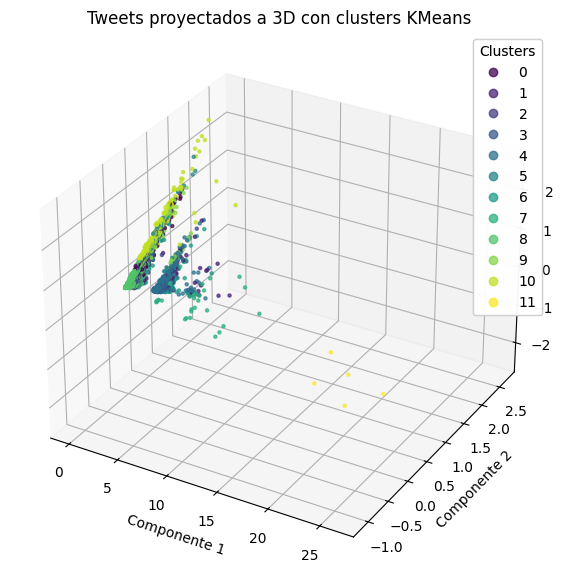

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from sklearn.decomposition import TruncatedSVD

# muestrear menos puntos para que no sea tan pesado
n_samples = 3000
if vec_train.shape[0] > n_samples:
    idx = np.random.choice(vec_train.shape[0], size=n_samples, replace=False)
    X_sample = vec_train[idx]
    clusters_sample = cluster_train[idx]
else:
    X_sample = vec_train
    clusters_sample = cluster_train

# 1) Reducir a 3 dimensiones
svd = TruncatedSVD(n_components=3, random_state=42)
X_3d = svd.fit_transform(X_sample)   # X_3d tiene shape (n_samples, 3)

# 2) Graficar en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    X_3d[:, 0],
    X_3d[:, 1],
    X_3d[:, 2],
    c=clusters_sample,   # color según cluster
    s=5,
    alpha=0.7
)

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title('Tweets proyectados a 3D con clusters KMeans')

# ax.set_xlim(0, 10) 
# leyenda con los colores de cada cluster
legend1 = ax.legend(*sc.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_final, y_train)

# Predecir en test
y_pred = knn.predict(X_test_final)

### Métricas

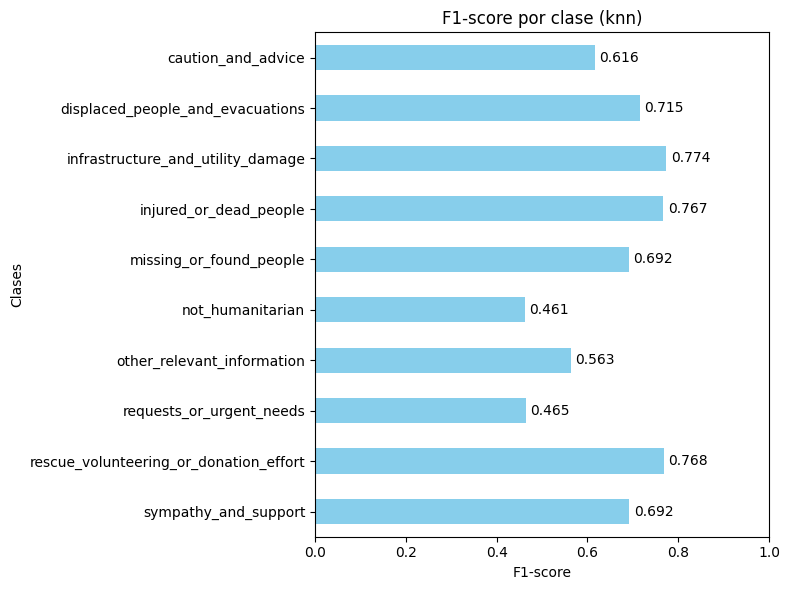

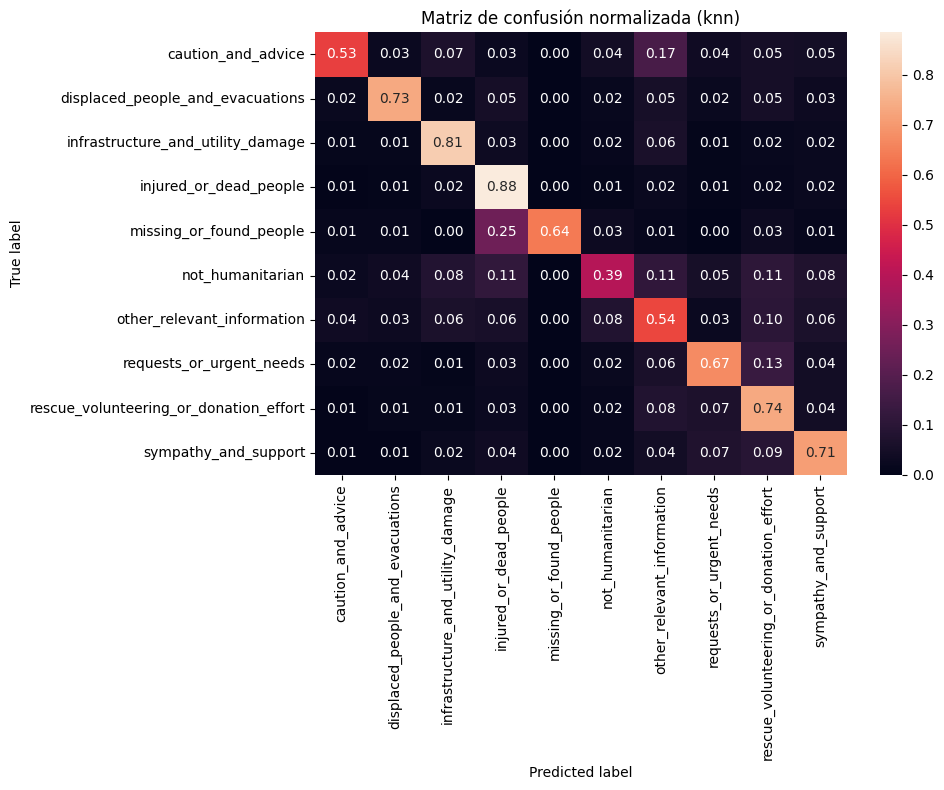

In [53]:
evaluar_modelo(y_test, y_pred, df_train, nombre_modelo="knn")

## Modelo sin not_humanitarian

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df_train=df.copy()
df_train.loc[df_train['class_label'] == 'not_humanitarian', 'class_label'] = 'other_relevant_information'

X_train_text = df_train['tweet_text']
y_train      = df_train['class_label']

X_test_text  = df_test['tweet_text']
y_test       = df_test['class_label']

vectorizador = CountVectorizer(strip_accents='ascii',
                               stop_words='english')

# vectorizador = TfidfVectorizer(strip_accents='ascii',
#                                stop_words='english')


vec_train = vectorizador.fit_transform(X_train_text)
vec_test = vectorizador.transform(X_test_text)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenar KNN
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(vec_train, y_train)

# Predecir en test
y_pred = knn.predict(vec_test)

/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


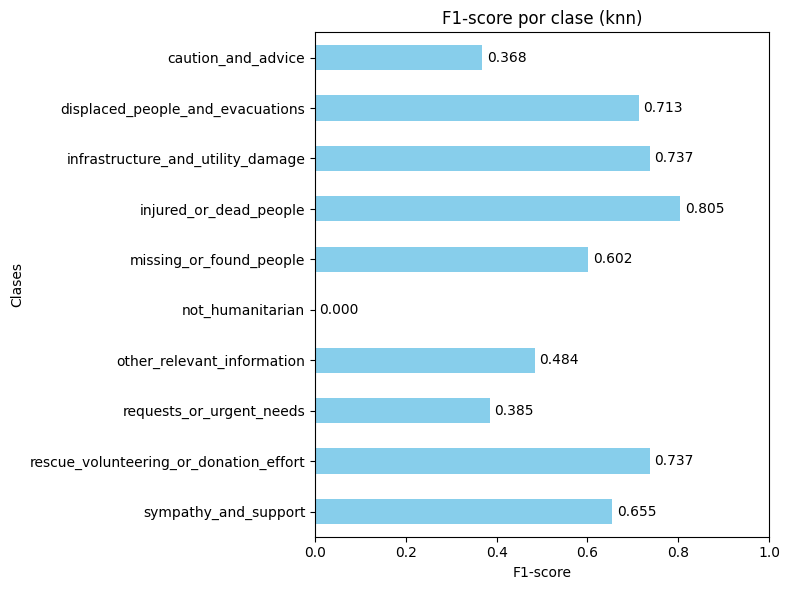

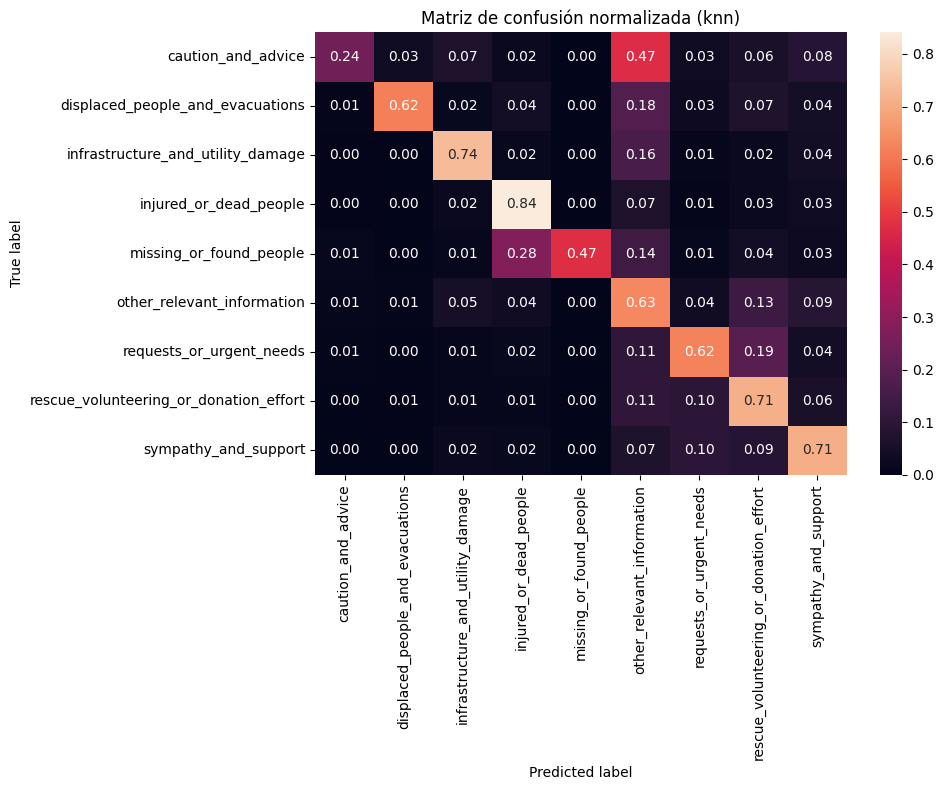

In [56]:
evaluar_modelo(y_test, y_pred, df_train, nombre_modelo="knn")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6ce46fef-7b41-4fc8-9158-2655f0d07967' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>